Student Details

Name:Michel Danjou

ID:18263461

Etivity 4

All necessary imports are provided. Please do not add further imports.

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

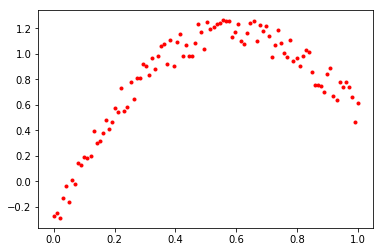

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]

lambdas = np.linspace(0,1,1000)
#lambdas = np.logspace(-10, 0, num=1000)  

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Correct results including plots. The chosen lambdas may not cover the range [0,1] appropriately and plots may not show very clear examples of over/underfitting.
  * Exemplary: Correct results, suitable range of <=1000 lambdas, plots clearly showing under+overfitting.

In [9]:
def plot_Eout_Ein_vs_lambda(lambda_min, lambda_max):
    # plot ein, eout for lambda > 0
    plt.plot(lambdas[:],ein[:], label='ein')
    plt.plot(lambdas[:],eout[:], label='eout')

    plt.xlim(lambda_min, lambda_max)

    plt.xlabel("lambdas")
    plt.ylabel("error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.title("Ein and Eout for lambda >= 0")

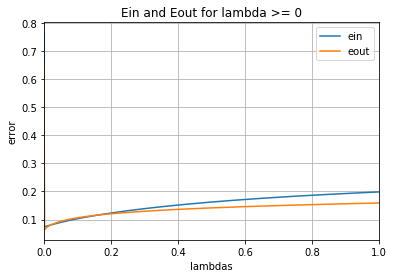

In [10]:
plot_Eout_Ein_vs_lambda(lambda_min=0, lambda_max=1)

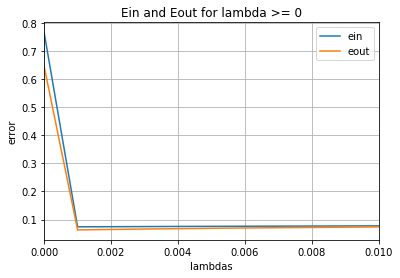

In [11]:
# Zoom in on the area where Eout is the smallest.
plot_Eout_Ein_vs_lambda(lambda_min=0, lambda_max=0.01)

### Observations:
The graph is showing both Ein and Eout. 

We can clearly see that:
  * Eout is high when lambda is 0, which corresponds to no regularization. 
  * Eout drops dramatically with a small value of lambda.
  * Both Eout and Ein start to increase as lambda grows.


In [12]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index          :", lowest_eout_index)
print("Best lambda used           :", best_lambda)
print("Eout without regularization:", eout[0])
print("Eout with regularization   :", eout[lowest_eout_index])
print("Difference                 :", eout[0] - eout[lowest_eout_index])

lowest_eout_index          : 1
Best lambda used           : 0.001001001001001001
Eout without regularization: 0.6466544688595738
Eout with regularization   : 0.06309728975008008
Difference                 : 0.5835571791094937


We notice a massive improvement for Eout after applying regularisation. I have ran this experiment multiple times and, although the results vary, we can see up to a 10 fold improvement on occasion.

# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

#### Rubric
See task 4.1 above

Text(0.5,1,'Eout by lambda (where lambda> 0)')

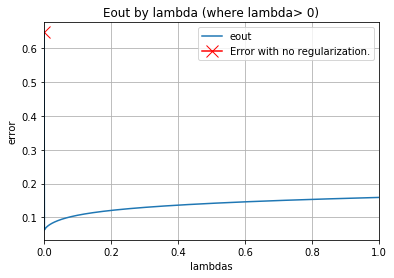

In [13]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Error with no regularization.")
plt.xlim(0,1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")


#### Observations
We can see that Eout is very high when lambda is 0, which is expected as it means there is no regularisation. The value of Eout(lambda=0) is represented with a <span style="color:red">red cross </span> on the above graph which can be seen on the top left part of the plot.

We can see an important improvement of Eout as soon as lambda starts to grow over 0. 
Eout then slowly increases as lambda grows.


In [14]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


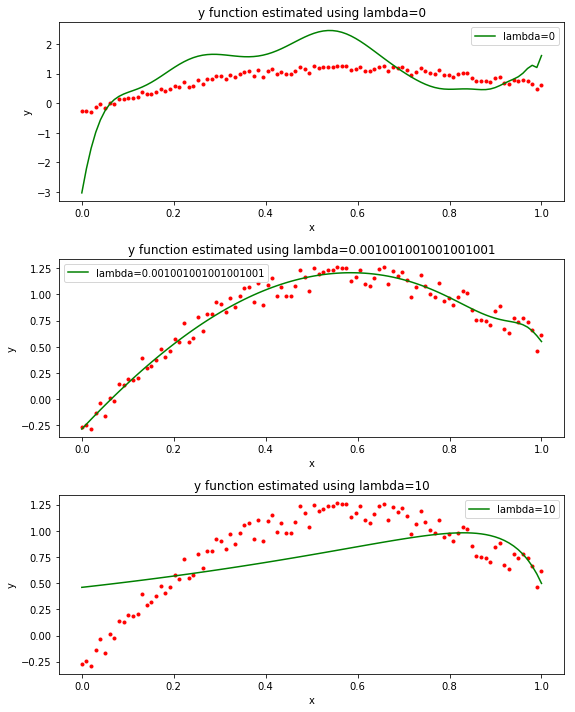

In [15]:
def experiment(l):

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights


plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



In [16]:
print("best lambda: ", best_lambda)

best lambda:  0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor. This is a case of over fitting.
  * for the optimum lambda, the polynomial estimates the target function very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function. This is a case of under fitting.


# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.
  
#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Full implementation of 10-fold CV yielding valid lambda and Eout.
  * Exemplary: Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.  

#### Implementation inspired by "Learning from Data" by Prof. Yaser S. Abu-Mostafa, p149, and  a review of Chelliah Kanthanathan's code.

#### Algorithm implemented:

Iterate over a large selection of lambda values between 0 and 1. 

For each lambda:
  * perform K-Fold cross validation.
  * Calculate Eout.
  * Keep the average Eout
  
Once all the lambdas are processed:
  * Find the lowest Eout and its corresponding lambda. This is the best lambda.
  * Calculate K-Fold once more to find the weights associated with the best lambda.
  
Plot the curve using the weight associated with the best lambda.  

In [17]:
# For a given value of lambda (l), run KFold on the data set and calculate the mean Eout.

def get_eval(l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X_trans):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # mean Eval
    Eval = np.mean(eout)
    print("Lambda:{} Eval: {}".format(l, Eval))

    return Eval


In [18]:
# For each possible lambda, call get_eval(l) in order to retreive the mean Eout.

all_eval = []
for l in lambdas:
    my_eval = get_eval(l)
    all_eval.append(my_eval)

    
# Find the lowest Eval and its corresponding lambda
lowest_eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))

Lambda:0.0 Eval: 4.026146272760144
Lambda:0.001001001001001001 Eval: 0.08701248602422285
Lambda:0.002002002002002002 Eval: 0.0864836455855123
Lambda:0.003003003003003003 Eval: 0.08622777723898975
Lambda:0.004004004004004004 Eval: 0.08614152728186157
Lambda:0.005005005005005005 Eval: 0.08617389754659854
Lambda:0.006006006006006006 Eval: 0.08629139504735536
Lambda:0.007007007007007007 Eval: 0.08647096285789044
Lambda:0.008008008008008008 Eval: 0.08669640498300102
Lambda:0.009009009009009009 Eval: 0.08695614699150742
Lambda:0.01001001001001001 Eval: 0.087241776952273
Lambda:0.011011011011011011 Eval: 0.08754708058577985
Lambda:0.012012012012012012 Eval: 0.08786739478946644
Lambda:0.013013013013013013 Eval: 0.08819916840022518
Lambda:0.014014014014014014 Eval: 0.08853965943149944
Lambda:0.015015015015015015 Eval: 0.08888672335866803
Lambda:0.016016016016016016 Eval: 0.08923866297854484
Lambda:0.017017017017017015 Eval: 0.0895941204818185
Lambda:0.018018018018018018 Eval: 0.0899519988544147

Lambda:0.1931931931931932 Eval: 0.12780605919837415
Lambda:0.1941941941941942 Eval: 0.12794673932889503
Lambda:0.19519519519519518 Eval: 0.12808708558140364
Lambda:0.1961961961961962 Eval: 0.1282271009718277
Lambda:0.1971971971971972 Eval: 0.12836678845981667
Lambda:0.1981981981981982 Eval: 0.12850615094989593
Lambda:0.1991991991991992 Eval: 0.12864519129260843
Lambda:0.20020020020020018 Eval: 0.12878391228561675
Lambda:0.2012012012012012 Eval: 0.12892231667479767
Lambda:0.2022022022022022 Eval: 0.12906040715529918
Lambda:0.2032032032032032 Eval: 0.12919818637258768
Lambda:0.2042042042042042 Eval: 0.12933565692346458
Lambda:0.20520520520520522 Eval: 0.12947282135706809
Lambda:0.2062062062062062 Eval: 0.12960968217585106
Lambda:0.2072072072072072 Eval: 0.12974624183653594
Lambda:0.2082082082082082 Eval: 0.12988250275106067
Lambda:0.2092092092092092 Eval: 0.13001846728748806
Lambda:0.21021021021021022 Eval: 0.13015413777091256
Lambda:0.2112112112112112 Eval: 0.13028951648433845
Lambda:0.

Lambda:0.35735735735735735 Eval: 0.14763721765167198
Lambda:0.35835835835835833 Eval: 0.147742413982035
Lambda:0.35935935935935936 Eval: 0.14784745032059968
Lambda:0.36036036036036034 Eval: 0.14795232702853398
Lambda:0.3613613613613614 Eval: 0.14805704446502826
Lambda:0.36236236236236236 Eval: 0.1481616029873287
Lambda:0.36336336336336333 Eval: 0.14826600295077727
Lambda:0.36436436436436437 Eval: 0.14837024470883717
Lambda:0.36536536536536535 Eval: 0.14847432861313806
Lambda:0.3663663663663664 Eval: 0.14857825501350214
Lambda:0.36736736736736736 Eval: 0.14868202425797866
Lambda:0.3683683683683684 Eval: 0.14878563669287587
Lambda:0.36936936936936937 Eval: 0.14888909266279116
Lambda:0.37037037037037035 Eval: 0.1489923925106426
Lambda:0.3713713713713714 Eval: 0.1490955365776973
Lambda:0.37237237237237236 Eval: 0.14919852520360077
Lambda:0.3733733733733734 Eval: 0.14930135872640865
Lambda:0.3743743743743744 Eval: 0.14940403748260733
Lambda:0.37537537537537535 Eval: 0.14950656180714866
Lamb

Lambda:0.5555555555555556 Eval: 0.16573225599178093
Lambda:0.5565565565565566 Eval: 0.16581144364586134
Lambda:0.5575575575575575 Eval: 0.1658905245848668
Lambda:0.5585585585585585 Eval: 0.16596949902492553
Lambda:0.5595595595595596 Eval: 0.16604836718175858
Lambda:0.5605605605605606 Eval: 0.16612712927067833
Lambda:0.5615615615615616 Eval: 0.1662057855065872
Lambda:0.5625625625625625 Eval: 0.1662843361039829
Lambda:0.5635635635635635 Eval: 0.16636278127695292
Lambda:0.5645645645645646 Eval: 0.16644112123917892
Lambda:0.5655655655655656 Eval: 0.1665193562039366
Lambda:0.5665665665665666 Eval: 0.16659748638409305
Lambda:0.5675675675675675 Eval: 0.1666755119921124
Lambda:0.5685685685685685 Eval: 0.16675343324004988
Lambda:0.5695695695695696 Eval: 0.16683125033955906
Lambda:0.5705705705705706 Eval: 0.16690896350188586
Lambda:0.5715715715715716 Eval: 0.1669865729378727
Lambda:0.5725725725725725 Eval: 0.16706407885795788
Lambda:0.5735735735735735 Eval: 0.16714148147217475
Lambda:0.574574574

Lambda:0.7267267267267267 Eval: 0.17788554364676845
Lambda:0.7277277277277278 Eval: 0.17794930161024686
Lambda:0.7287287287287287 Eval: 0.1780129841632804
Lambda:0.7297297297297297 Eval: 0.17807659145744492
Lambda:0.7307307307307307 Eval: 0.1781401236439792
Lambda:0.7317317317317317 Eval: 0.1782035808737818
Lambda:0.7327327327327328 Eval: 0.1782669632974147
Lambda:0.7337337337337337 Eval: 0.17833027106510188
Lambda:0.7347347347347347 Eval: 0.17839350432673146
Lambda:0.7357357357357357 Eval: 0.17845666323185433
Lambda:0.7367367367367368 Eval: 0.17851974792968603
Lambda:0.7377377377377378 Eval: 0.1785827585691066
Lambda:0.7387387387387387 Eval: 0.17864569529866237
Lambda:0.7397397397397397 Eval: 0.17870855826656504
Lambda:0.7407407407407407 Eval: 0.1787713476206927
Lambda:0.7417417417417418 Eval: 0.17883406350859055
Lambda:0.7427427427427428 Eval: 0.1788967060774726
Lambda:0.7437437437437437 Eval: 0.17895927547421925
Lambda:0.7447447447447447 Eval: 0.1790217718453811
Lambda:0.74574574574

Lambda:0.8948948948948949 Eval: 0.18764642041261273
Lambda:0.8958958958958959 Eval: 0.1876993908142323
Lambda:0.8968968968968969 Eval: 0.18775230695861697
Lambda:0.8978978978978979 Eval: 0.1878051689484579
Lambda:0.8988988988988988 Eval: 0.18785797688620312
Lambda:0.8998998998998999 Eval: 0.18791073087406024
Lambda:0.9009009009009009 Eval: 0.18796343101399393
Lambda:0.9019019019019019 Eval: 0.18801607740773035
Lambda:0.9029029029029029 Eval: 0.18806867015675427
Lambda:0.9039039039039038 Eval: 0.18812120936231125
Lambda:0.9049049049049049 Eval: 0.18817369512540943
Lambda:0.9059059059059059 Eval: 0.18822612754681697
Lambda:0.9069069069069069 Eval: 0.18827850672706492
Lambda:0.9079079079079079 Eval: 0.18833083276644697
Lambda:0.9089089089089089 Eval: 0.18838310576502051
Lambda:0.9099099099099099 Eval: 0.18843532582260658
Lambda:0.9109109109109109 Eval: 0.18848749303879048
Lambda:0.9119119119119119 Eval: 0.18853960751292295
Lambda:0.9129129129129129 Eval: 0.18859166934412058
Lambda:0.91391

In [19]:
# Return the weights corresponding to the lowest Eout generated with Kfold.
def get_weights_for_eout(l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X_trans):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return weights[lowest_eout_index]


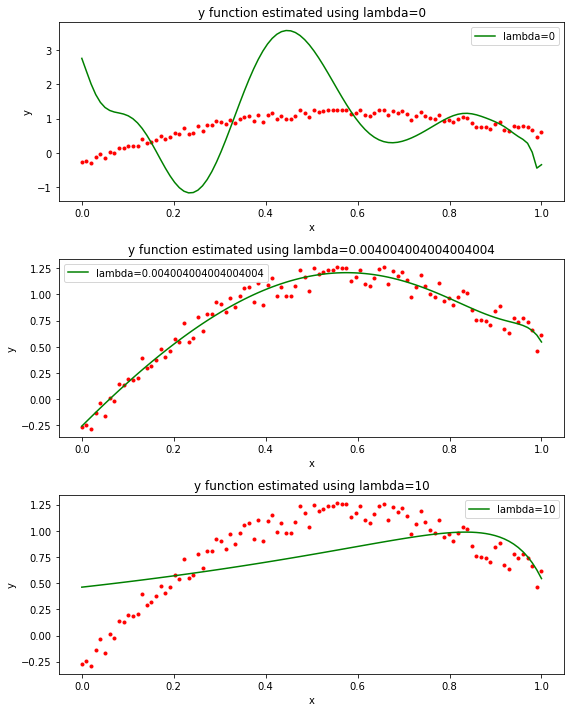

In [20]:
# Plot overfit, best approximation and underfit curves.

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
best_weights = []

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    weights = get_weights_for_eout(ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

    # keep the weights for 'best_lambda' so that we can analyse them later on.
    if(i==2):
        best_weights = weights
        
plt.show()


In [21]:
print("best_weights:", best_weights)

best_weights: [-2.58334143e-01  4.39218221e+00 -2.01454257e+00 -1.75699576e+00
 -6.95378850e-01 -2.67547593e-02  2.44639968e-01  2.86528140e-01
  2.28230109e-01  1.43176659e-01  6.62505537e-02  1.04298145e-02
 -2.24217204e-02 -3.54174715e-02 -3.34030102e-02 -2.13504640e-02
 -3.63957062e-03  1.61986529e-02  3.55073751e-02  5.24229397e-02
  6.57529026e-02  7.48465754e-02  7.94741542e-02  7.97211808e-02
  7.59001882e-02  6.84789273e-02  5.80234582e-02  4.51539971e-02
  3.05113980e-02  1.47323099e-02 -1.56870491e-03 -1.78115493e-02
 -3.34586789e-02 -4.80198907e-02 -6.10546120e-02 -7.21723326e-02
 -8.10316842e-02 -8.73385665e-02 -9.08436286e-02 -9.13393423e-02
 -8.86568491e-02 -8.26627157e-02 -7.32556969e-02 -6.03635790e-02
 -4.39401525e-02 -2.39623467e-02 -4.27547798e-04  2.66488897e-02
  5.72359357e-02  9.12889821e-02  1.28751752e-01]


In [22]:
print("best_lambda:{}".format(best_lambda))

best_lambda:0.004004004004004004


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function trend very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


### Possible algorithm improvements

#### Combine multiple functions
`get_eval()` and `get_weights_for_eout()` share a lot of code in common and could be refactored into a single function.

#### Hold back data

We should **hold back** a portion of the data set and use it to only **evaluate the final model**, which would provide an **unbiased evaluation of Eout**.  

So in terms of algorithm we should consider doing this: 

  * Split the data set between training set  and testing set (80/20 rule) 
  * Run the KFold on the training set to find the best lambda 
  * Once we have the best lambda and associated weights, we calculate Eout on the testing set that we had saved at step 1. 

More information regarding holding out a portion of the data set for evaluating the final model: https://machinelearningmastery.com/difference-test-validation-datasets/

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Rubric
  * Beginning: Incorrect use of LassoCV and Ridge CV.
  * Developing: Incorrect use of LassCV or RidgeCV.
  * Accomplished: LassoCV and RidgeCV used correctly. Valid commentary on difference in lambda obtained in Task 1,2.
  * Exemplary: Correct use of Lasso&RidgeCV. Valid commentary on lambda including insights in the differences with Task 1,2 relating to the ability to approximate Eout correctly.

References: 
  * https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
  * https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
    * Describes how RidgeVC and LassoCV perform better at reducting over-fitting compared to simple Linear regression. 

What is the difference between Ridge and RidgeCV?
  * https://stats.stackexchange.com/questions/262640/the-results-of-cv-on-ridge-are-different-than-the-results-of-ridgecv

In [23]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = title
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("score  :", score)
    print("params :", params)
    print("lambdas:", lambdas)
    print("coefs  :", coeffs)

## Ridge

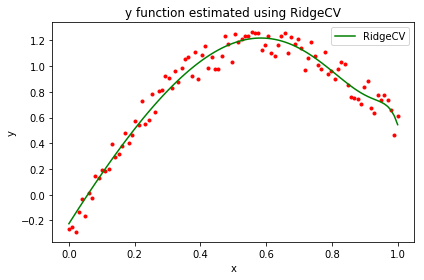

score  : 0.9641069194516706
params : <bound method BaseEstimator.get_params of RidgeCV(alphas=array([0.001, 0.002, ..., 0.999, 1.   ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)>
lambdas: 0.01001001001001001
coefs  : [ 0.00000000e+00  4.03906823e+00 -1.41257922e+00 -1.59856276e+00
 -8.81370303e-01 -3.11813345e-01  6.45399619e-03  1.49186905e-01
  1.93316714e-01  1.89333601e-01  1.65834726e-01  1.37544253e-01
  1.11250922e-01  8.94811653e-02  7.26138369e-02  6.00497721e-02
  5.08363638e-02  4.39855582e-02  3.86224035e-02  3.40419450e-02
  2.97182973e-02  2.52904050e-02  2.05380074e-02  1.53550587e-02
  9.72430083e-03  3.69468091e-03 -2.63779244e-03 -9.14574742e-03
 -1.56829802e-02 -2.20942180e-02 -2.82225412e-02 -3.39148728e-02
 -3.90259014e-02 -4.34207572e-02 -4.69767078e-02 -4.95840964e-02
 -5.11467064e-02 -5.15816960e-02 -5.08192230e-02 -4.88018509e-02
 -4.54838097e-02 -4.08301668e-02 -3.48159516e-02 -2.74252659e-02
 -1.

In [24]:
clf = RidgeCV(alphas=lambdas[1:]).fit(X_trans, y)

alternate_regression("RidgeCV", clf)

## Lasso

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


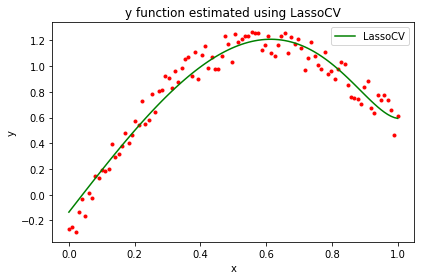

score  : 0.9501972423829628
params : <bound method BaseEstimator.get_params of LassoCV(alphas=array([0.   , 0.001, ..., 0.999, 1.   ]), copy_X=True, cv=10,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=0,
    selection='cyclic', tol=0.0001, verbose=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.          3.2895831  -0.         -2.91925643 -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.01521044  0.2521122   0.09138359  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [25]:
clf = LassoCV(alphas=lambdas, cv=10, random_state=0).fit(X_trans, y)

alternate_regression("LassoCV", clf)

## Analysis

Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Lasso and Ridge are 2 different regularisers:

##### Ridge:
Ridge performs L2 regularization which adds a penalty equivalent to square of the magnitude of coefficients. L2 regularization has the effect of shrinking the weights which helps to reduce the model complexity. This can be clearly seen by the output of the coef_ parameters.

Ridge selected the following optimum lambda: **0.001001001001001001**.

##### Lasso:
Performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Lasso pushes a large number of weights to zero which results in simpler models. This can be clearly seen by the output of the coef_ parameters.

Lasso found the following optimum lambda: **0.001001001001001001**.

#### Ridge & Lasso compared to our own implementation
Here is what we notice when comparing the 3 regularization approaches:
  * The weights generated by our own algorithm are similar in value to the ones generated by Ridge's.
  * Ridge, Lasso, and our own algorithm, generally find **different values for lambda**, but on occasion, like here, they are **identical**.
  * Lambda is generally very small.

